In [28]:
#!/usr/bin/python

from __future__ import division
#import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
import sys
import os
import matplotlib
%matplotlib inline
from scipy.stats import mode
from IPython.display import HTML
from pylab import rcParams
import scipy as sp

# HTML('''<script>
# code_show=true;
# function code_toggle() {
# if (code_show){
# $('div.input').hide();
# } else {
# $('div.input').show();
# }
# code_show = !code_show
# }
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Distribution of Non-2 Copy-Numbers Across the Genome of 38 Normal Cells

In [29]:
# GET DATA INTO DATAFRAME (DF)
OUTPUTDIR = "/n/fs/ragr-data/projects/scDNA/results/results_single-cell-cnv-inf/results_mine/distribution_non-2_copy_number_outputs/"
OUTDIR_NAME = "38_normal_10KB_bins_wrong_right__distribution_non-2_copy_number.csv"
df = pd.read_csv("/n/fs/ragr-data/projects/scDNA/data/T5_normal_nochrY/ginkgo_39normal_noChrY/38normal_cells_nochrY_variable_CN_10kb.tsv", sep='\t') # 38normal_cells_nochrY_fixed_CN_250kb.tsv
df.replace({r'\r\n': ''},regex=True);

In [31]:
# Iterate through all columns (cells)
# Produce: cell, TP, TN, FP, FN
with open(OUTDIR_NAME, 'w') as f:
    f.write("Cell, Right, Wrong, Perc_Wrong\n")
    for i in list(df)[3:]:
        print i
        dict_cn_freqs = (df[i].value_counts()).to_dict()
        right = dict_cn_freqs[2]
        del dict_cn_freqs[2]
        wrong = sum(dict_cn_freqs.values())
        perc_wrong = wrong /(right+wrong) * 100
        f.write(i+","+str(right)+","+str(wrong)+","+str(perc_wrong)+"\n")
        #f.writelines(lines)
    

SRR3082145_1_nochrY
SRR3082320_1_nochrY
SRR3082321_1_nochrY
SRR3082322_1_nochrY
SRR3082323_1_nochrY
SRR3082324_1_nochrY
SRR3082325_1_nochrY
SRR3082326_1_nochrY
SRR3082327_1_nochrY
SRR3082328_1_nochrY
SRR3082329_1_nochrY
SRR3082330_1_nochrY
SRR3082419_1_nochrY
SRR3082420_1_nochrY
SRR3082421_1_nochrY
SRR3082422_1_nochrY
SRR3082423_1_nochrY
SRR3082424_1_nochrY
SRR3082425_1_nochrY
SRR3082426_1_nochrY
SRR3082439_1_nochrY
SRR3082440_1_nochrY
SRR3082441_1_nochrY
SRR3082443_1_nochrY
SRR3082444_1_nochrY
SRR3082445_1_nochrY
SRR3082458_1_nochrY
SRR3082469_1_nochrY
SRR3082471_1_nochrY
SRR3082480_1_nochrY
SRR3082484_1_nochrY
SRR3082485_1_nochrY
SRR3082497_1_nochrY
SRR3082498_1_nochrY
SRR3082501_1_nochrY
SRR3082511_1_nochrY
SRR3082512_1_nochrY
merged_cell_T5_normal_not2512_not2324_not2498_0pt1_nochrY.bam.sorted.bam
merged_cell_T5_normal_not2512_not2324_not2498_nochrY.bam.sorted


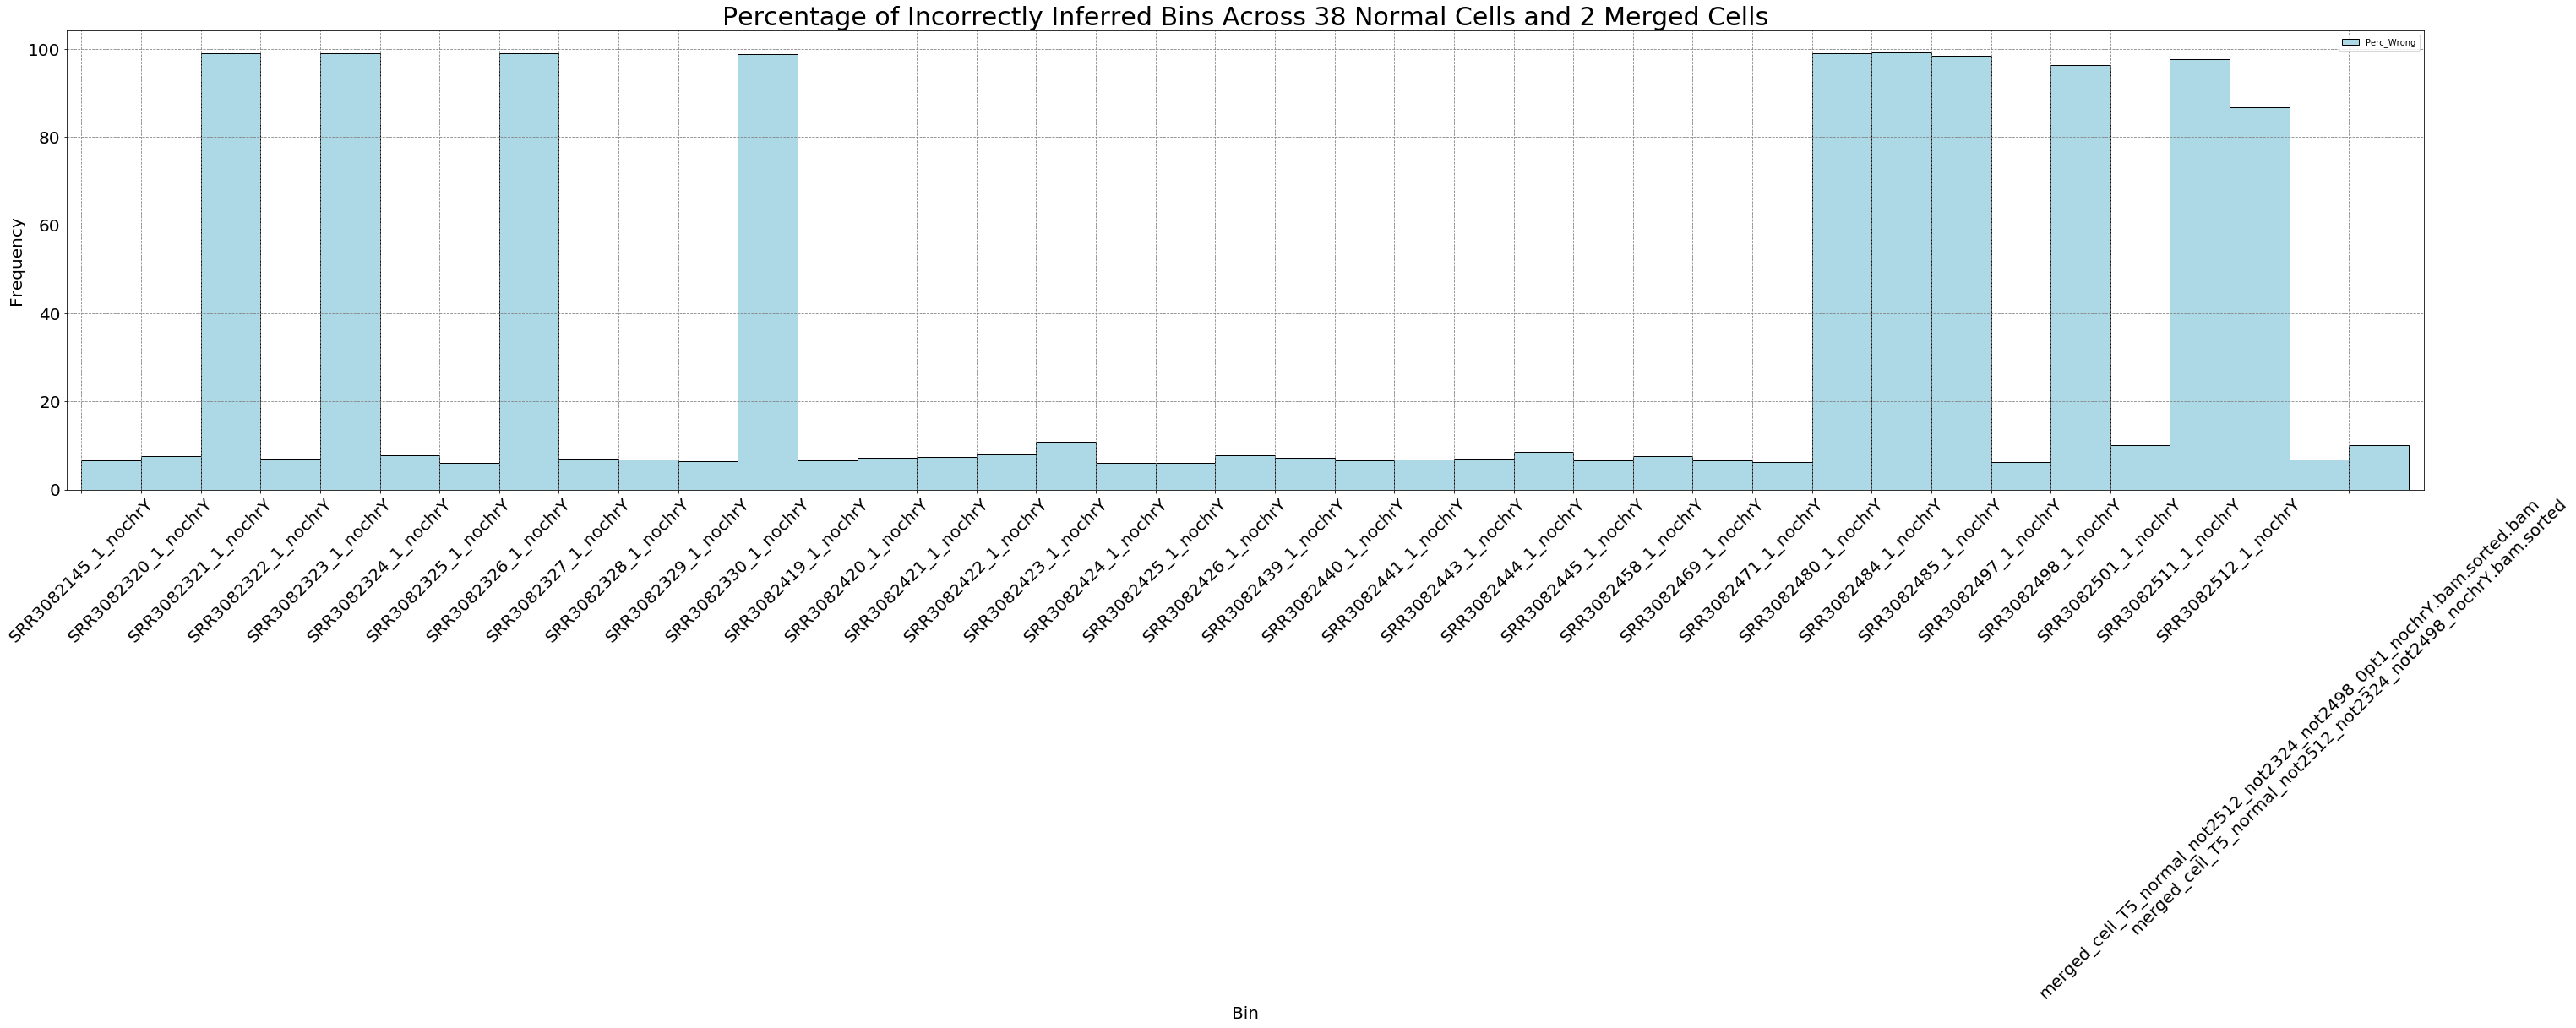

In [33]:
df_perc_wrong = pd.read_csv(OUTDIR_NAME, skipinitialspace=True, usecols=['Cell', 'Perc_Wrong'])
#df_.set_value('C', 'x', 10)
#df_perc_wrong.loc[df_perc_wrong['Cell'] == 'merged_cell_T5_normal_not2512_not2324_not2498_0pt1_nochrY.bam.sorted.bam'] = 'merged_cell_downsampled'
#print df_perc_wrong
fig = df_perc_wrong.set_index('Cell').plot(kind="bar", color="lightblue", position=0, width=1.0, rot=0, ec='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xlabel('Bin', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Percentage of Incorrectly Inferred Bins Across 38 Normal Cells and 2 Merged Cells', fontsize = 30)
#plt.xticks([1,500001,1750001])
#print "max", small_ax_0['INDEX'].max()
#print "min", small_ax_0['INDEX'].min()
#print np.append(np.arange(small_ax_0['INDEX'].min(),small_ax_0['INDEX'].max(),500001),small_ax_0['INDEX'].max())
#print np.append(np.arange(min(list(small_ax_0['INDEX'])), max(list(small_ax_0['INDEX']))+1, 500001), small_ax_0['INDEX'].max))
#plt.xticks(np.arange(min(list(small_ax_0[0])), max(list(small_ax_0[0]))+1, 5.0))
#plt.xticks(np.append(np.arange(small_ax_0['INDEX'].min(),small_ax_0['INDEX'].max(),500001),small_ax_0['INDEX'].max()))
plt.grid(b=True, which='major', color='grey', linestyle='--')
rcParams['figure.figsize'] = 50, 10
plt.xticks( rotation = 45)
#plt.yticks([0,1,2,3,4,5,6,7,20,30])
#plt.set_xticklabels( ['tom','dick','harry'], rotation=45 ) 
#plt.locator_params(tight=True, nbins=3) #int(len(small_ax_0)/2))
plt.savefig("38_normal_perc_wrong.pdf")
plt.show()

In [41]:
def tally_P_R():
    FP = FN = TN = TP = 0
    return FP, FN, TP, TN

In [ ]:
def check_row(row, chro, start, end):
    if (row['CHRM'] == 'chr11') and (row['START'] in range(5000000,10000000)) and (row['END'] in range(5000000,10000000)): # chr 11 5MB deletion
        print chro, start, end
    elif (row['CHRM'] == 'chr5') and (row['START'] in range(80000,880000)) and (row['END'] in range(80000,880000)):# chr 5 800
        print chro, start, end
    elif (row['CHRM'] == 'chr2') and (row['START'] in range(500000,1000000)) and (row['END'] in range(500000,1000000)):#
        print chro, start, end
    elif (CLONE == '40kbdup') and (row['CHRM'] == 'chr7') and (row['START'] in range(1000000,1040000)) and (row['END'] in range(1000000,1040000)):
        print chro, start, end
    elif (CLONE == '40kbdel') and (row['CHRM'] == 'chr7') and (row['START'] in range(1000000,1040000)) and (row['END'] in range(1000000,1040000)):
        print chro, start, end
    elif (CLONE == '4020kbdup') and (row['CHRM'] == 'chr7') and (row['START'] in range(2000000,2040000)) and (row['END'] in range(2000000,2040000)):
        print chro, start, end
    elif (CLONE == '4020kbdup') and (row['CHRM'] == 'chr6') and (row['START'] in range(1000000,1020000)) and (row['END'] in range(1000000,1020000)):
        print chro, start, end

In [ ]:
# Iterate through all columns (cells)
# Produce: cell, TP, TN, FP, FN
with open(OUTDIR_NAME, 'w') as f:
    f.write("Cell, Right, Wrong, Perc_Wrong\n")
    for i in list(df)[3:]:
        print i
        dict_cn_freqs = (df[i].value_counts()).to_dict()
        right = dict_cn_freqs[2]
        del dict_cn_freqs[2]
        wrong = sum(dict_cn_freqs.values())
        perc_wrong = wrong /(right+wrong) * 100
        f.write(i+","+str(right)+","+str(wrong)+","+str(perc_wrong)+"\n")
        #f.writelines(lines)

In [49]:
# CONVERT CHROMOSOME NAME INTO ASCII TO SEE WHEN ROW VALUE CHANGES IN COLUMN df['CHR']
def convert_string_num(row):
    a = [ord(c) for c in row['CHR']]
    num = int(''.join(map(str,a)))
    return num

In [50]:
# DF RUNNING convert_string_num()

df['ASCII_CHR'] = df.apply(convert_string_num, axis=1)
df['CHANGE_CHR'] = df['ASCII_CHR'].diff()
#print list(df['CHANGE_CHR'])

change_chrom_list = list(df['CHANGE_CHR'])
list_chr = [i for i, e in enumerate(change_chrom_list) if e != 0]

#print np.count_nonzero(change_chrom_list) # count number of non-zero entries, and should be 24
print list_chr

[0, 998, 1971, 2764, 3529, 4253, 4938, 5575, 6161, 6726, 7269, 7810, 8346, 8807, 9237, 9648, 10010, 10335, 10648, 10885, 11138, 11331, 11537]


In [54]:
# GETTING LIST OF CELLS : ['SRR3082145_1.fastq.gz', 'SRR3082320_1.fastq.gz', 'SRR3082321_1.fastq.gz', 'SRR3082322_1.fastq.gz', 'SRR3082323_1.fastq.gz', 'SRR3082324_1.fastq.gz', 'SRR3082325_1.fastq.gz', 'SRR3082326_1.fastq.gz', 'SRR3082327_1.fastq.gz', 'SRR3082328_1.fastq.gz', 'SRR3082329_1.fastq.gz', 'SRR3082330_1.fastq.gz', 'SRR3082419_1.fastq.gz', 'SRR3082420_1.fastq.gz', 'SRR3082421_1.fastq.gz', 'SRR3082422_1.fastq.gz', 'SRR3082423_1.fastq.gz', 'SRR3082424_1.fastq.gz', 'SRR3082425_1.fastq.gz', 'SRR3082426_1.fastq.gz', 'SRR3082439_1.fastq.gz', 'SRR3082440_1.fastq.gz', 'SRR3082441_1.fastq.gz', 'SRR3082443_1.fastq.gz', 'SRR3082444_1.fastq.gz', 'SRR3082445_1.fastq.gz', 'SRR3082457_1.fastq.gz', 'SRR3082458_1.fastq.gz', 'SRR3082469_1.fastq.gz', 'SRR3082471_1.fastq.gz', 'SRR3082480_1.fastq.gz', 'SRR3082484_1.fastq.gz', 'SRR3082485_1.fastq.gz', 'SRR3082497_1.fastq.gz', 'SRR3082498_1.fastq.gz', 'SRR3082501_1.fastq.gz', 'SRR3082511_1.fastq.gz', 'SRR3082512_1.fastq.gz']

cells_list = df.columns.values.tolist()[3:-2] # removing CHR, START, END, ASCII_CHR, CHANGE_CHR
print cells_list
print len(cells_list) # should be 38 cells

['SRR3082145_1_nochrY', 'SRR3082320_1_nochrY', 'SRR3082321_1_nochrY', 'SRR3082322_1_nochrY', 'SRR3082323_1_nochrY', 'SRR3082324_1_nochrY', 'SRR3082325_1_nochrY', 'SRR3082326_1_nochrY', 'SRR3082327_1_nochrY', 'SRR3082328_1_nochrY', 'SRR3082329_1_nochrY', 'SRR3082330_1_nochrY', 'SRR3082419_1_nochrY', 'SRR3082420_1_nochrY', 'SRR3082421_1_nochrY', 'SRR3082422_1_nochrY', 'SRR3082423_1_nochrY', 'SRR3082424_1_nochrY', 'SRR3082425_1_nochrY', 'SRR3082426_1_nochrY', 'SRR3082439_1_nochrY', 'SRR3082440_1_nochrY', 'SRR3082441_1_nochrY', 'SRR3082443_1_nochrY', 'SRR3082444_1_nochrY', 'SRR3082445_1_nochrY', 'SRR3082457_1_nochrY', 'SRR3082458_1_nochrY', 'SRR3082469_1_nochrY', 'SRR3082471_1_nochrY', 'SRR3082480_1_nochrY', 'SRR3082484_1_nochrY', 'SRR3082485_1_nochrY', 'SRR3082497_1_nochrY', 'SRR3082498_1_nochrY', 'SRR3082501_1_nochrY', 'SRR3082511_1_nochrY', 'SRR3082512_1_nochrY']
38


In [55]:
# CREATING DATAFRAME OF FREQUENCY OF EACH COPY-NUMBER OCCURRENCE IN EACH BIN 

df_new = df[cells_list].apply(pd.Series.value_counts,axis=1).fillna(0)
df_new["INDEX"] = df["START"]
#print df_new.columns.values 

In [56]:
# CREATING COLUMN OF SUM OF ALL NON-2 COPY-NUMBERS
df_tosum = df_new.drop([2, 'INDEX'], axis=1) # remove 2 from df so to not sum freq of those counts across the 38 cells
df_new['SUM_NON-2'] = df_tosum.sum(axis=1)

In [59]:
# SMALL EXAMPLE TO PLOT DISTRIBUTION OF NON-2 COPY-NUMBERS ACROSS GENOME OF 38 NORMAL CELLS

small_ax_0 = df_new[['INDEX', 0]].head(100)
print small_ax_0
print list(small_ax_0['INDEX'])

       INDEX     0
0          1  23.0
1     250001  23.0
2     500001  23.0
3     750001  18.0
4    1000001   0.0
5    1250001   0.0
6    1500001   0.0
7    1750001   0.0
8    2000001   0.0
9    2250001   0.0
10   2500001   0.0
11   2750001   0.0
12   3000001   0.0
13   3250001   0.0
14   3500001   0.0
15   3750001   0.0
16   4000001   0.0
17   4250001   0.0
18   4500001   0.0
19   4750001   0.0
20   5000001   0.0
21   5250001   0.0
22   5500001   0.0
23   5750001   0.0
24   6000001   0.0
25   6250001   0.0
26   6500001   0.0
27   6750001   0.0
28   7000001   0.0
29   7250001   0.0
..       ...   ...
70  17500001   0.0
71  17750001   0.0
72  18000001   0.0
73  18250001   0.0
74  18500001   0.0
75  18750001   0.0
76  19000001   0.0
77  19250001   0.0
78  19500001   0.0
79  19750001   0.0
80  20000001   0.0
81  20250001   0.0
82  20500001   0.0
83  20750001   0.0
84  21000001   0.0
85  21250001   0.0
86  21500001   0.0
87  21750001   0.0
88  22000001   0.0
89  22250001   0.0
90  22500001

max 24750001
min 1
[       1   500002  1000003  1500004  2000005  2500006  3000007  3500008
  4000009  4500010  5000011  5500012  6000013  6500014  7000015  7500016
  8000017  8500018  9000019  9500020 10000021 10500022 11000023 11500024
 12000025 12500026 13000027 13500028 14000029 14500030 15000031 15500032
 16000033 16500034 17000035 17500036 18000037 18500038 19000039 19500040
 20000041 20500042 21000043 21500044 22000045 22500046 23000047 23500048
 24000049 24500050 24750001]


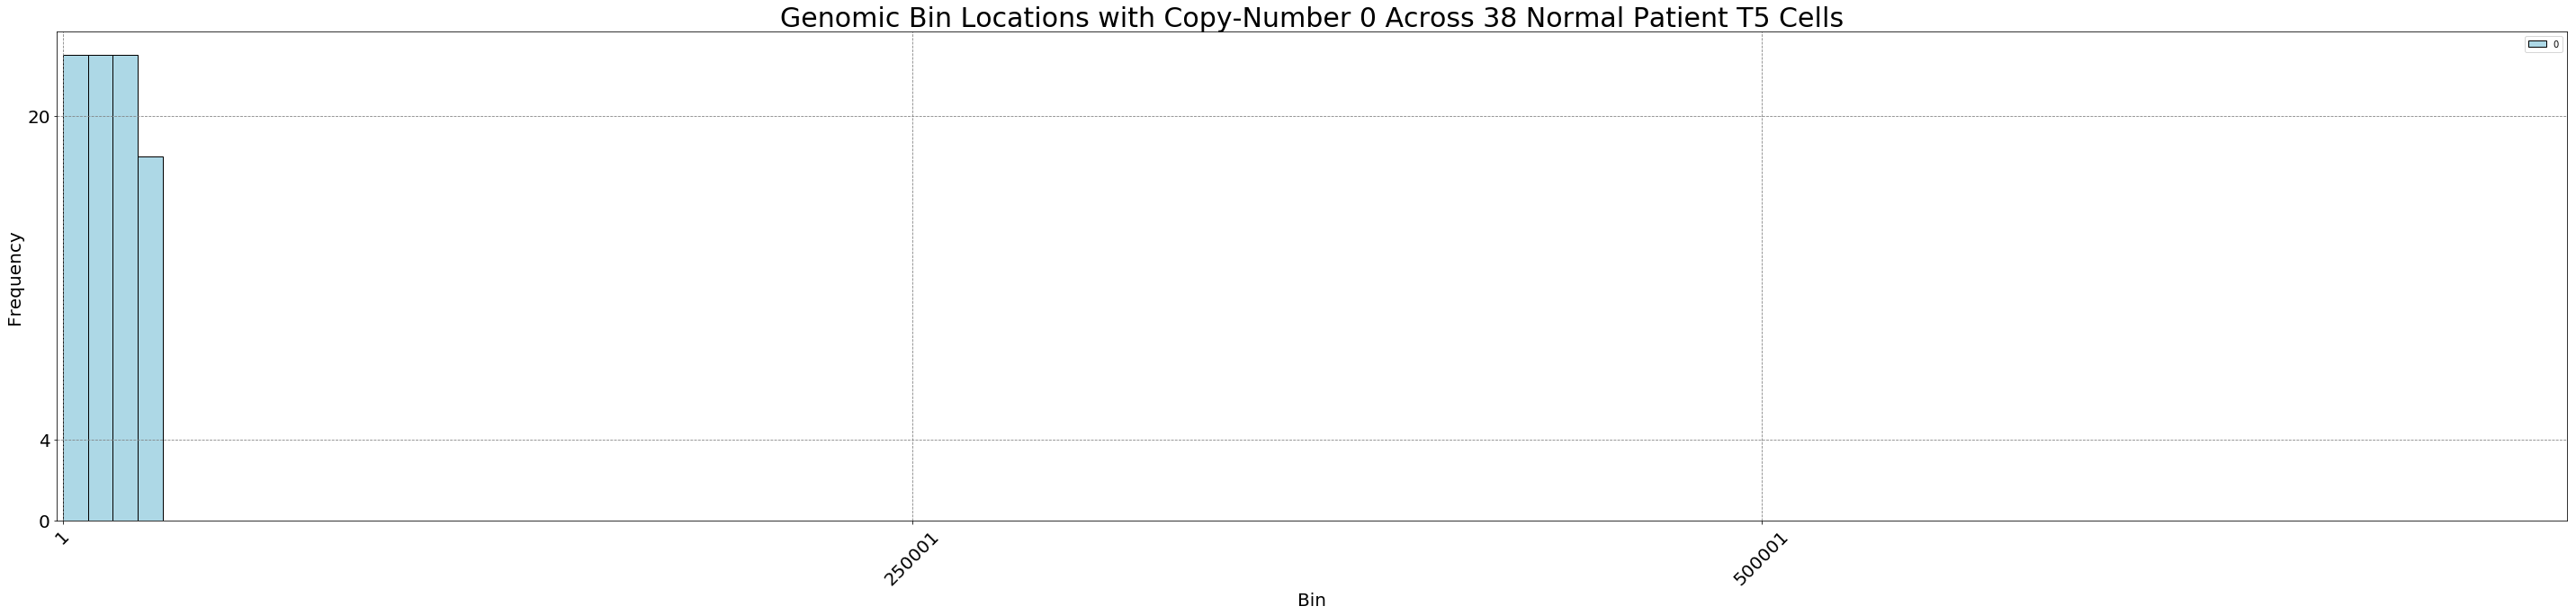

In [70]:
# SMALL EXAMPLE OF PLOT DISTRIBUTION OF INPUT COPY-NUMBER ACROSS GENOME OF 38 NORMAL CELLS

fig = small_ax_0.set_index('INDEX').plot(kind="bar", color="lightblue", position=0, width=1.0, rot=0, ec='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xlabel('Bin', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Genomic Bin Locations with Copy-Number 0 Across 38 Normal Patient T5 Cells', fontsize = 30)
#plt.xticks([1,500001,1750001])
print "max", small_ax_0['INDEX'].max()
print "min", small_ax_0['INDEX'].min()
print np.append(np.arange(small_ax_0['INDEX'].min(),small_ax_0['INDEX'].max(),500001),small_ax_0['INDEX'].max())
#print np.append(np.arange(min(list(small_ax_0['INDEX'])), max(list(small_ax_0['INDEX']))+1, 500001), small_ax_0['INDEX'].max))
#plt.xticks(np.arange(min(list(small_ax_0[0])), max(list(small_ax_0[0]))+1, 5.0))
#plt.xticks(np.append(np.arange(small_ax_0['INDEX'].min(),small_ax_0['INDEX'].max(),500001),small_ax_0['INDEX'].max()))
plt.grid(b=True, which='major', color='grey', linestyle='--')
rcParams['figure.figsize'] = 50, 10
plt.xticks( rotation = 45)
plt.yticks([0,1,2,3,4,5,6,7,20,30])
#plt.set_xticklabels( ['tom','dick','harry'], rotation=45 ) 
plt.locator_params(tight=True, nbins=3) #int(len(small_ax_0)/2))
plt.savefig("tester_10kb.pdf")
plt.show()

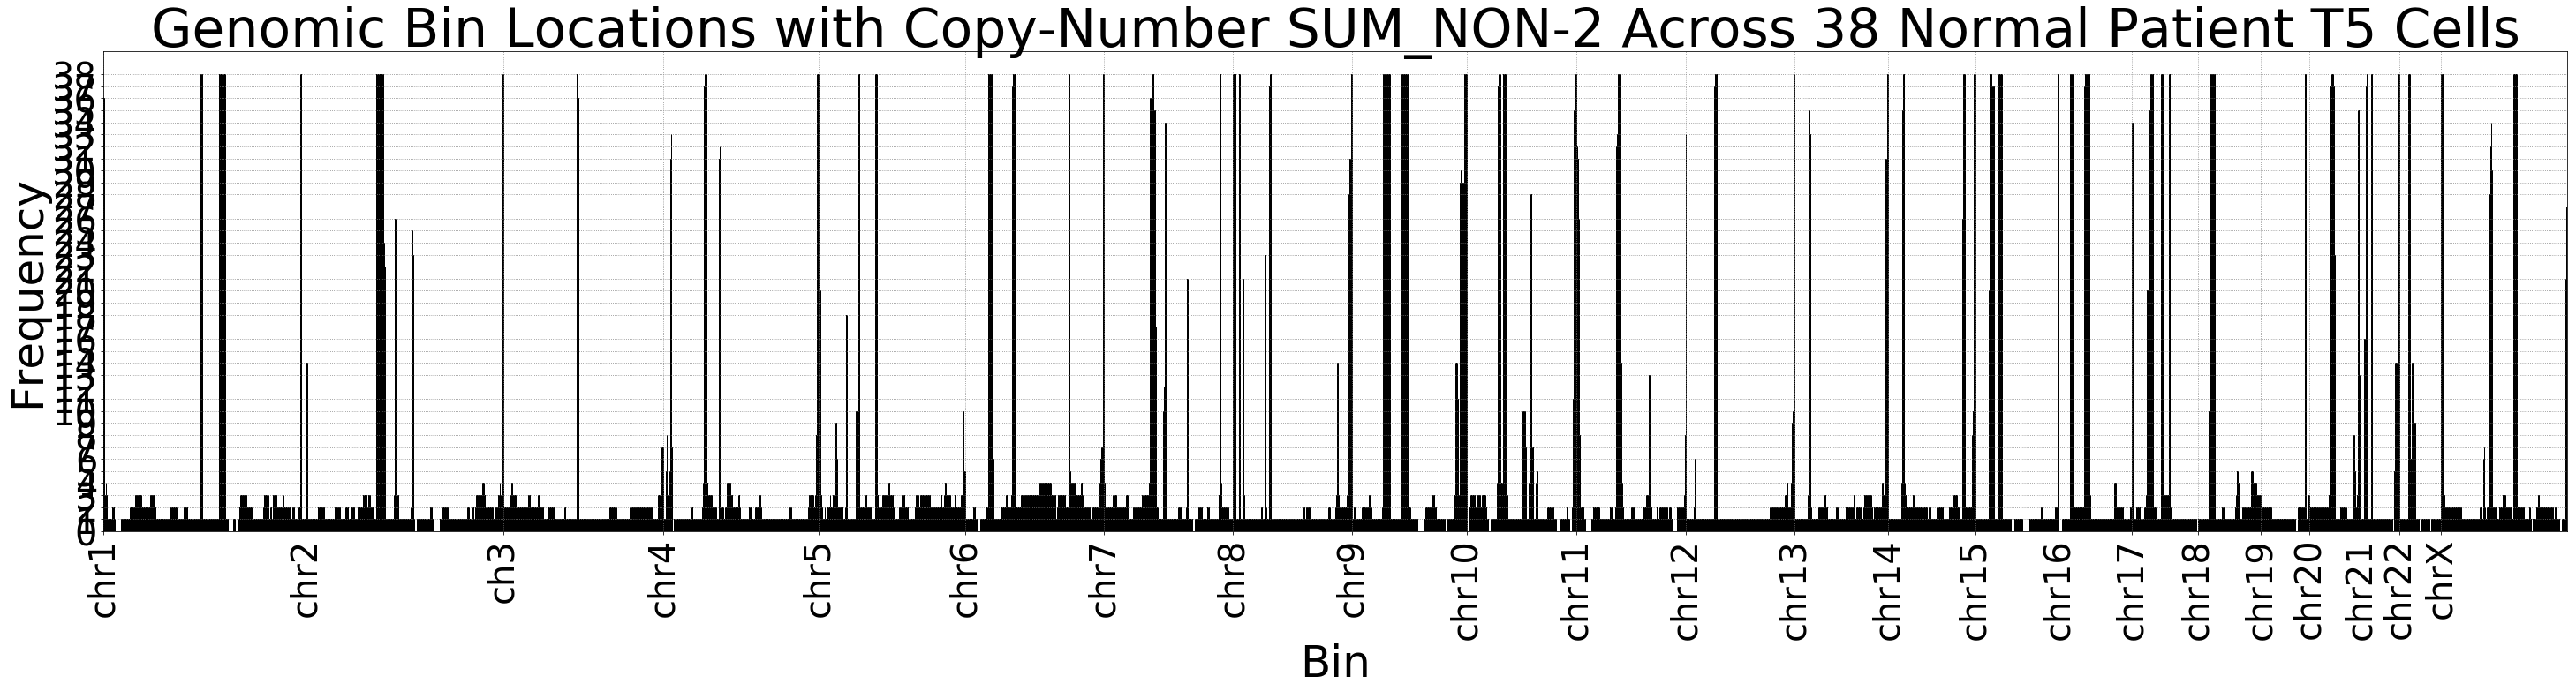

In [61]:
# CHROM START LABELED X AXIS
# PLOT DISTRIBUTION OF INPUT COPY-NUMBER ACROSS GENOME OF 38 NORMAL CELLS: X-AXIS IS LABELED BY CHROMOSOME START

def dist_genom_cn_CHR_X_AXIS(COPY_NUMBER):
    
    ax = df_new[[COPY_NUMBER, 'INDEX']] # Column of SUM_NON-2 = COPY_NUMBER
    fig = ax.set_index('INDEX').plot(kind="bar", color="black", position=0, width=1.0, rot=0, ec='black', legend=False) ##

    plt.tick_params(axis='both', which='major', labelsize=40)
    plt.tick_params(axis='both', which='minor', labelsize=40)
    plt.xlabel('Bin', fontsize=50)
    plt.ylabel('Frequency', fontsize=50)

    plt.title('Genomic Bin Locations with Copy-Number %s Across 38 Normal Patient T5 Cells'%COPY_NUMBER,  fontsize = 60) ##

    plt.grid(b=True, which='major', color='grey', linestyle='dotted')
    plt.xticks( rotation = 45)

    plt.yticks(range(0,39)) ##
    ticks_x = list_chr# [0, 998, 1971, 2764, 3529, 4253, 4938, 5575, 6161, 6726, 7269, 7810, 8346, 8807, 9237, 9648, 10010, 10335, 10648, 10885, 11138, 11331, 11537, 12159]
    labels = ['chr1', 'chr2', 'ch3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']#, 'chrY']
    plt.xticks(ticks_x, labels, rotation='vertical')
    rcParams['figure.figsize'] = 150, 50
    #plt.locator_params(tight=True, nbins= 100)

    plt.savefig(OUTPUTDIR+"/cn_%s_chr_T5_normal_cells_blah.pdf" % COPY_NUMBER) ##
    plt.show()
COPY_NUM = ['SUM_NON-2'] # Column of the sum of all non-2 read counts!
#COPY_NUM = [0,1,2,3,4,5,6,7,8,9,10]

for i in COPY_NUM:
    dist_genom_cn_CHR_X_AXIS(i)
plt.close()

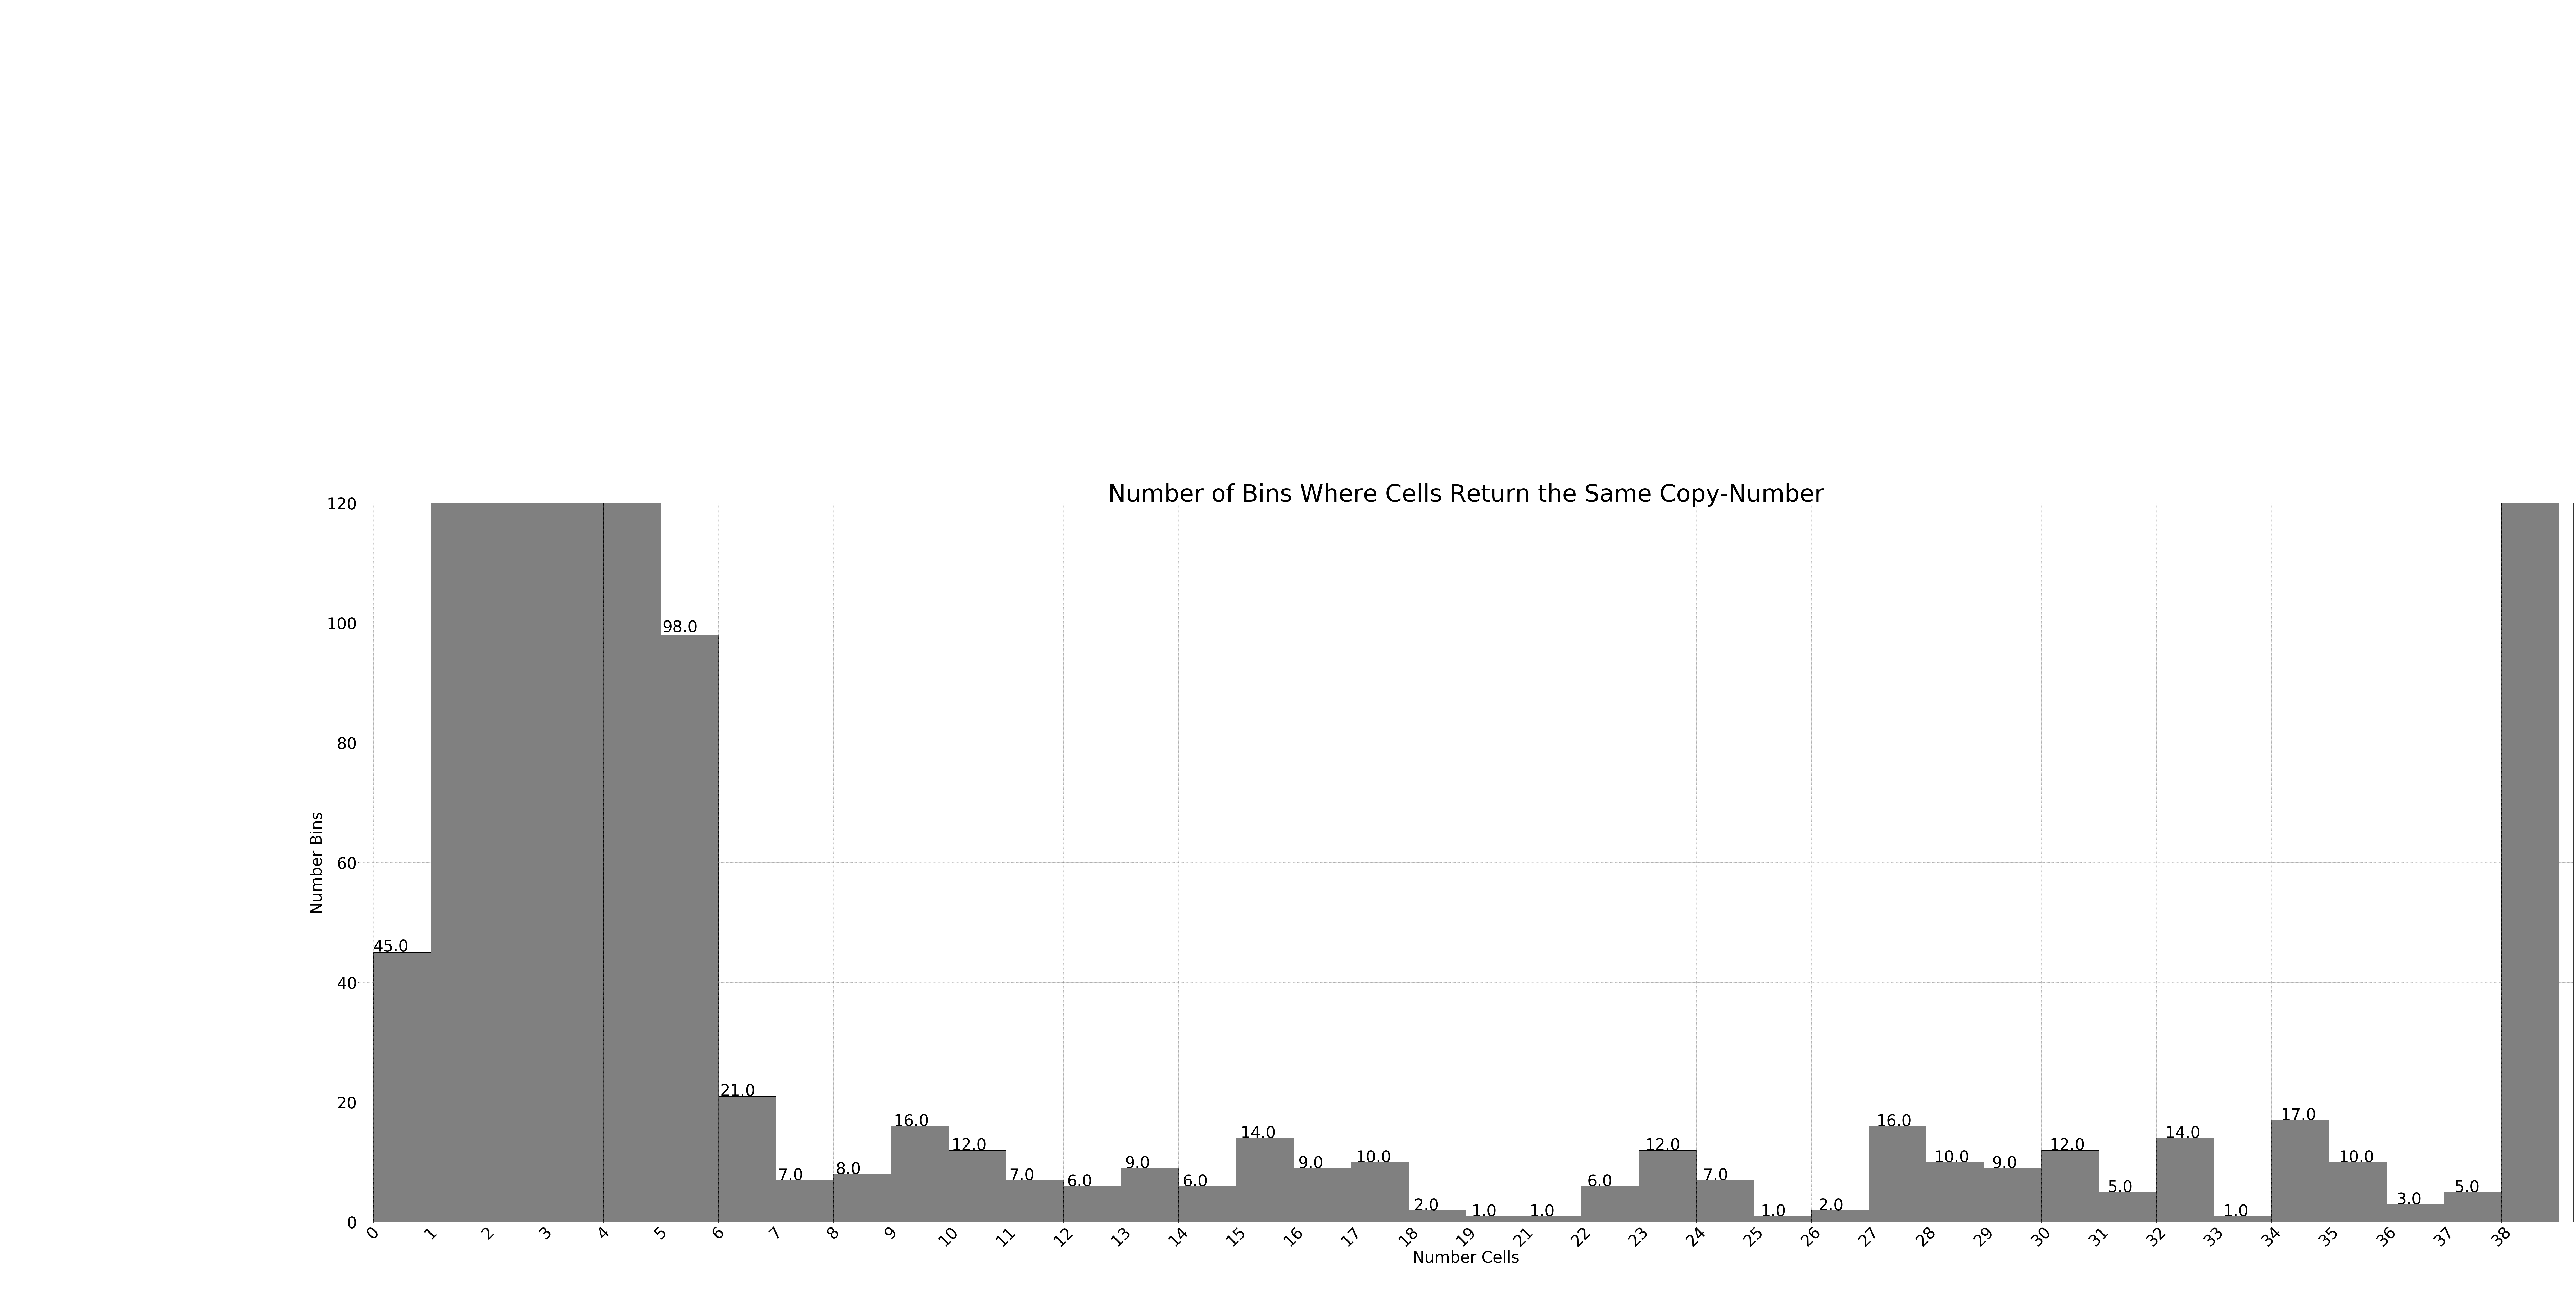

In [41]:
# Plot the number of bins with a particular frequency of cells. 

# Count fraction of bins at 38 cells 
df_counts = df_new['SUM_NON-2'].value_counts().reset_index()
df_counts.columns = ['FREQ_CELL', 'COUNT']
df_counts = df_counts.astype(int)
df_counts = df_counts.sort_values('FREQ_CELL')

# Plot
fig2 = df_counts.set_index('FREQ_CELL').plot(kind="bar",color='grey', position=0, width=1.0, rot=0, ec='black', legend=False)
plt.tick_params(axis='both', which='major', labelsize=60)
plt.tick_params(axis='both', which='minor', labelsize=60)
plt.xlabel('Number Cells', fontsize=60)
plt.ylabel('Number Bins', fontsize=60)
plt.title('Number of Bins Where Cells Return the Same Copy-Number', fontsize = 90) ##
plt.grid(b=True, which='major', color='grey', linestyle='dotted')
plt.xticks( rotation = 45)
rcParams['figure.figsize'] = 150, 50
axes = plt.gca()
#axes.set_ylim([0, 120])

# Annotate the bars with the number of bins
for p in fig2.patches:
    fig2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=60)
plt.savefig(OUTPUTDIR+"/num_bins_at_that_freq_cells_variable__distribution_non-2_copy_number_blah.pdf") ##
plt.show()
#df_counts.sort_values(axis=1)
# Get fraction of bins at # and down: 30,25,20,15,10,5

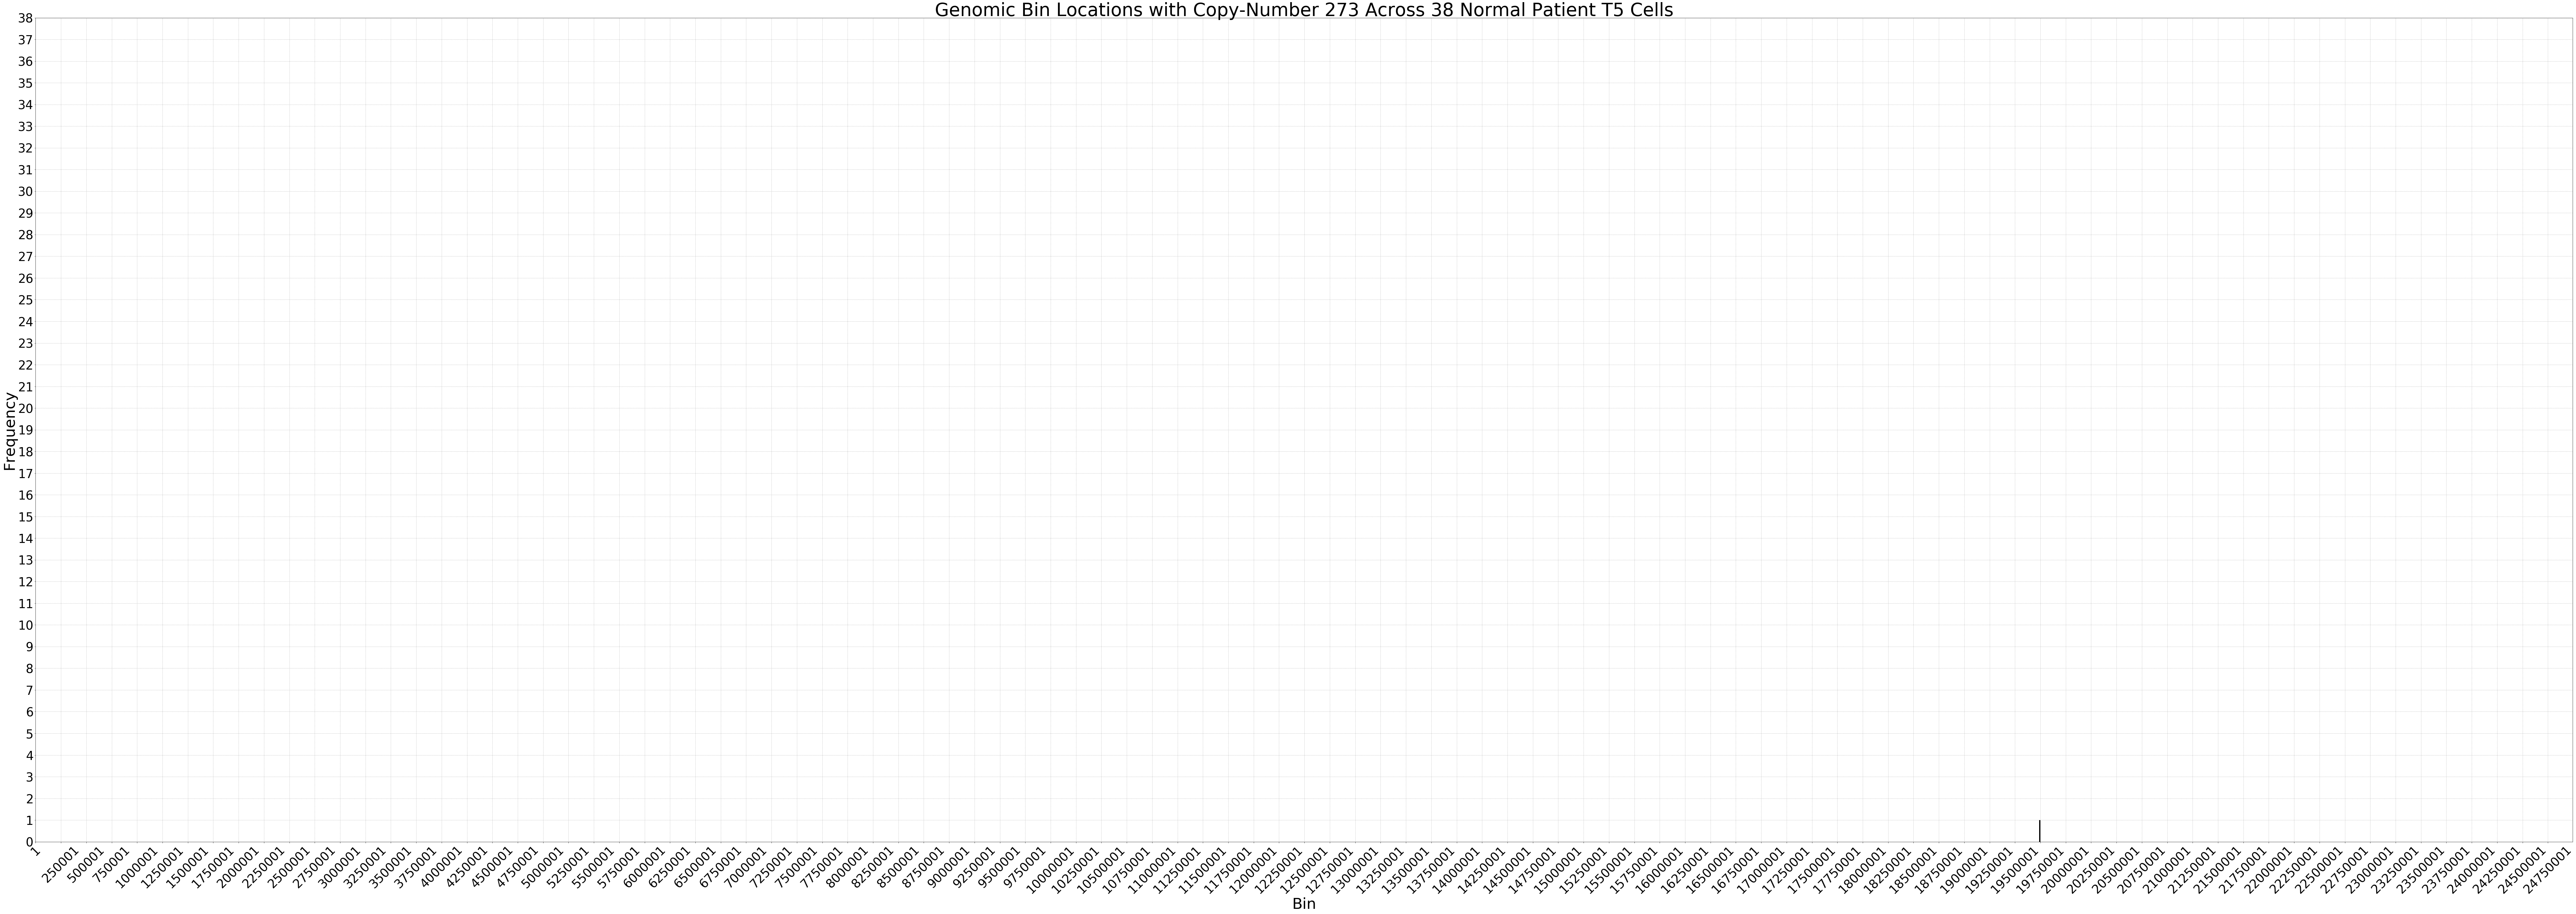

In [22]:
# BIN LABELED X AXIS
# PLOT DISTRIBUTION OF INPUT COPY-NUMBER ACROSS GENOME OF 38 NORMAL CELLS: X-AXIS IS LABELED BY 1 OF 100 BINS

def dist_genom_cn(COPY_NUMBER):
    ax = df_new[[COPY_NUMBER, 'INDEX']] ##
    fig = ax.set_index('INDEX').plot(kind="bar", color="black", position=0, width=1.0, rot=0, ec='black', legend=False) ##

    plt.tick_params(axis='both', which='major', labelsize=40)
    plt.tick_params(axis='both', which='minor', labelsize=40)
    plt.xlabel('Bin', fontsize=50)
    plt.ylabel('Frequency', fontsize=50)

    plt.title('Genomic Bin Locations with Copy-Number %d Across 38 Normal Patient T5 Cells'%COPY_NUMBER,  fontsize = 60) ##

    plt.grid(b=True, which='major', color='grey', linestyle='dotted')
    plt.xticks( rotation = 45)

    rcParams['figure.figsize'] = 150, 50 
    plt.locator_params(tight=True, nbins= 100)
    plt.yticks(range(0,39)) # plt.yticks(range(0,int(ax_1[1].max())+1))

    plt.savefig("cn_%d_T5_normal_cells_fixedYaxis.pdf" % COPY_NUMBER) ##
    plt.show()
    plt.close()
COPY_NUM = [0,1,3,4,5,6,7,8,9,10]

for i in COPY_NUM:
    dist_genom_cn(i)

## Example Plots 

In [8]:
# SMALL EXAMPLE FOR convert_string_num()

df_small = df.head() 
df_small.ix[3,'CHR']='chr10'
df_small.ix[4, 'CHR'] = 'chr10'

df_small['ASCII_CHR'] = df_small.apply(convert_string_num, axis=1)
df_small['CHANGE_CHR'] = df_small['ASCII_CHR'].diff()

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
/u/amconard/.local/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

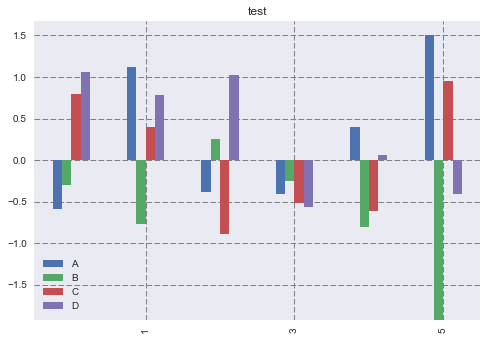

In [69]:
# TEST PLOT 1
df_example.plot(kind='bar', title ="test",  legend=True, fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xticks(np.arange(min(indices),max(indices),2), np.arange(min(indices),max(indices),2))
plt.grid(b=True, which='major', color='grey', linestyle='--')
plt.show()

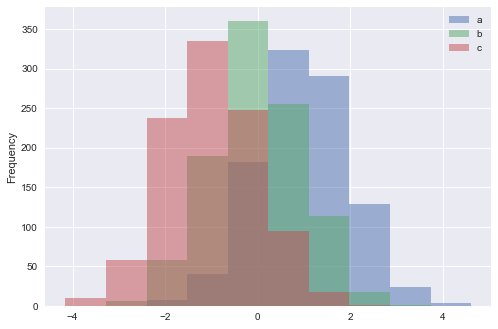

In [56]:
# TEST PLOT 2
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
   ....:                     'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
plt.figure();
df4.plot.hist(alpha=0.5)
plt.show()

[23.0, 23.0, 23.0, 18.0, 0.0]
[1, 250001, 500001, 750001, 1000001]


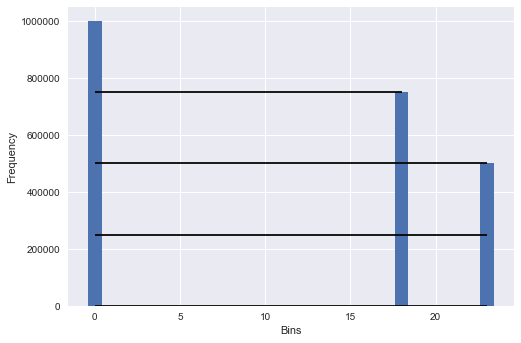

In [59]:
# TEST PLOT 3
x = list(small_ax_0[0])#(1,2,3,4,5)
print x
y = list(small_ax_0['INDEX'])#(1,2,3,4,5)
print y

plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Bins')
plt.ylabel('Frequency')
for i in range(len(y)):
    plt.hlines(y[i],0,x[i]) # Here you are drawing the horizontal lines
plt.show()

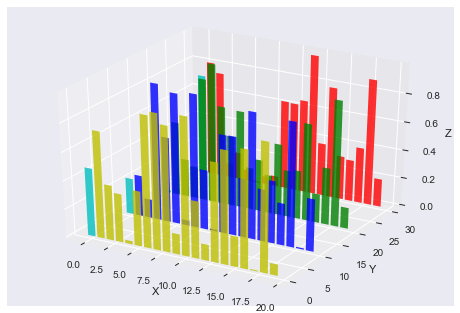

In [61]:
# TEST PLOT 4
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()